# **1. Dane studenta.**

Olga Krużyńska, 151919

# **2. Informacje o zbiorze danych.**

Baza danych została znaleziona dzięki stronie https://www.kaggle.com/datasets. Pełny link prowadzący bezpośrednio do zbioru znajduje się na końcu opisu.

Badany zbiór danych zawiera informacje o parametrach komórek guzów piersi. Każdy wynik w tabeli to uśredniona wartość z komórek pobranych od danego pacjenta.
W tej analizie skupię się głównie na kolumnach mean_radius, odpowiadająca za promień komórki, mean_perimeter (obwód), mean_area (powierzchnia) oraz diagnosis, która informuje o postawionej diagnozie (czy guz został uznany za złośliwy (0) czy łagodny (1)).
W bazie danych znajduje się jeszcze kolumna mean_smoothness odpowiadająca za lokalne zmiany w długości promienia oraz mean_texture jednak nie będziemy się na nich skupiać podczas analizy.


Dane zostały zebrane z badań rzeczywistych pacjentów ze szpitala uniwersyteckiego UW Health. Szpital znajduje się na kampusie Uniwersytetu Wisconsin-Madison w Madison w stanie Wisconsin. Dane posłużą do porównania nowotworów piersi złośliwych i łagodnych.


Link:
https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset?resource=download&fbclid=IwAR0Ik-Gdmv_KKlXLcyOR1Kv216YQUL7-RlKSePsqWZ7KxJ7dVd3FER2KUcE

In [1]:
options(scipen=999)
library("readxl")
data<-read_xlsx("dane.xlsx", sheet = 1)
data

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.990,10.38,122.80,1001.0,0.11840,0
20.570,17.77,132.90,1326.0,0.08474,0
19.690,21.25,130.00,1203.0,0.10960,0
11.420,20.38,77.58,386.1,0.14250,0
20.290,14.34,135.10,1297.0,0.10030,0
12.450,15.70,82.57,477.1,0.12780,0
18.250,19.98,119.60,1040.0,0.09463,0
13.710,20.83,90.20,577.9,0.11890,0
13.000,21.82,87.50,519.8,0.12730,0


# **3. Analiza eksploracyjna.**


###  3.1. Szeregi rozdzielcze i histogramy.

W tej sekcji zostaną wyznaczone szeregi rozdzielcze i histogramy dla 4 kolumn z danymi: mean_radius, mean_texture, mean_perimeter oraz mean_area. Opisy poszczególnych kroków zostaną wykonane dla kolumny mean_radius.

Zaczniemy od wyznaczenia rozpiętości danych. W tym celu liczymy rozstęp:

In [2]:
R <- max(data$mean_radius) - min(data$mean_radius)
sprintf("Rozstęp dla kolumny mean_radius:   %f ", R)

[1] "Rozstęp dla kolumny mean_radius:   21.129000 "

Następnie ustalamy liczbę przedziałów k. Z racji tego, że jest wiele sposobów na zrobienie tego, k wyliczymy kilkoma z nich i wybierzemy najlepszą wartość.

In [3]:
n<-length(data$mean_radius)
k1 <- sqrt(n)
k2 <- 1+3.322*log(n)
k3 <- 5*log(n)
k4 <- R/(2.64*n^(-1/3)*IQR(data$mean_radius))
l_klas <- matrix(c(k1,k2,k3,k4),dimnames = list(c("sqrt(n)", "1+3.322log(n)","5log(n)", "(max-min)/h"),c("wynik")))
l_klas

,wynik
sqrt(n),23.85372
1+3.322log(n),22.07437
5log(n),31.71940
(max-min)/h,16.25495


Pierwsze dwa sposoby dały zbliżone do siebie wartości. Trzecia i czwarta metoda dały wartości skrajne i mimo że nie odbiegają one bardzo od reszty, odrzucamy je. Za k przyjmujemy wartość obliczoną pierwszym sposobem, odpowiednio zaokrągloną.
Mając wyznaczoną liczbę przedziałów k, wyznaczamy rozpiętość przedziałów h i zaokrąglamy tę wartość w górę.

In [4]:
k <- round(k1)
h <- ceiling(R/k)
sprintf("Wyznaczona rozpiętość przedziałów:  %d", h)

[1] "Wyznaczona rozpiętość przedziałów:  1"

Teraz możemy skonstruować szereg rozdzielczy. Najpierw wyznaczamy początek pierwszego przedziału. Będzie to wartość mniejsza od najmniejszej wartości badanej kolumny.

nr.klasy,początek.klasy,koniec.klasy,liczebnosc.klasy
<int>,<dbl>,<dbl>,<int>
1,6,7,1
2,7,8,3
3,8,9,13
4,9,10,30
5,10,11,38
6,11,12,86
7,12,13,88
8,13,14,78
9,14,15,59


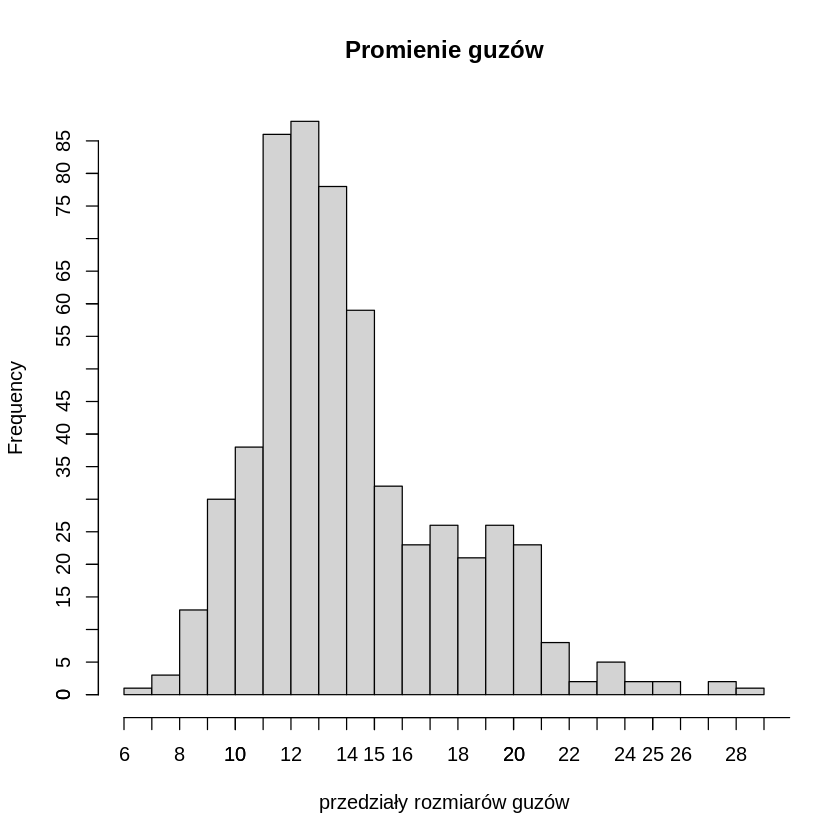

In [5]:
bgn <- floor(min(data$mean_radius))

szereg_rozdz <- data.frame(nr.klasy = seq(1, k))
szereg_rozdz$początek.klasy <- bgn + (szereg_rozdz$nr.klasy - 1)*h
szereg_rozdz$koniec.klasy <- bgn + (szereg_rozdz$nr.klasy - 1)*h + h
szereg_rozdz$liczebnosc.klasy <- NA
 
for (i in 1:k) {
  szereg_rozdz$liczebnosc.klasy[i] <- 
    sum(data$mean_radius>szereg_rozdz$początek.klasy[i] & data$mean_radius<=szereg_rozdz$koniec.klasy[i])
}

szereg_rozdz
histogram <- hist(data$mean_radius, main="Promienie guzów", xlab="przedziały rozmiarów guzów", breaks=k)
axis(1,at=seq(6,30,by=1))
axis(2,at=seq(0,max(szereg_rozdz$liczebnosc.klasy),by=5))

Powyższy histogram unimodalny - jest jeden pik, otoczony niższymi słupkami. Nie jest on symetryczny, cechuje go antysymetryczność prawostronna.

### 3.2. Wartości statystyk opisowych - miary tendencji centralnej.
W tej sekcji zostaną wyznaczone miary tendencji centralnej, tj. wartości średniej, mediany i dominanty.
Najpierw dane podzielone zostaną według diagnozy. Następnie dla każdej kolumny zostaną wyznaczone wartości centralne.


In [6]:
promienie = list(zlosliwy=c(), lagodny=c())
powierzchnia = list(zlosliwy=c(), lagodny=c())
obwod = list(zlosliwy=c(), lagodny=c())


for (i in 1:length(data$diagnosis)) {
    if(data$diagnosis[i] == 1){
        promienie$lagodny <- c(promienie$lagodny, data$mean_radius[i])
        powierzchnia$lagodny <- c(powierzchnia$lagodny, data$mean_area[i])
        obwod$lagodny <- c(obwod$lagodny, data$mean_perimeter[i])
    } else {
        promienie$zlosliwy <- c(promienie$zlosliwy, data$mean_radius[i])
        powierzchnia$zlosliwy <- c(powierzchnia$zlosliwy, data$mean_area[i])
        obwod$zlosliwy <- c(obwod$zlosliwy, data$mean_perimeter[i])
    }
}

parametry = list(promienie, powierzchnia, obwod)

Poniższy kod oblicza poszczególne wartości miar centralnych dla trzech parametrów guzów. Wyniki zapisywane są do wektorów, a te dodawane są do ramek danych. Każdy parametr ma własną ramkę na dane. Wartości mediany i średniej zostały zaokrąglone, by zapewnić czytelność.

In [7]:
mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}


df<- data.frame("Mediana" = c(median(promienie$zlosliwy), median(promienie$lagodny)), 
                "Średnia" =  c(mean(promienie$zlosliwy), mean(promienie$lagodny)),
                "Dominanta" = c(mode(promienie$zlosliwy), mode(promienie$lagodny)))
rownames(df)<-c("Złośliwy", "Łagodny")

df2<- data.frame("Mediana" = c(median(powierzchnia$zlosliwy), median(powierzchnia$lagodny)), 
                "Średnia" =  c(mean(powierzchnia$zlosliwy), mean(powierzchnia$lagodny)),
                "Dominanta" = c(mode(powierzchnia$zlosliwy), mode(powierzchnia$lagodny)))
rownames(df2)<-c("Złośliwy", "Łagodny")

df3<- data.frame("Mediana" = c(median(obwod$zlosliwy), median(obwod$lagodny)), 
                "Średnia" =  c(mean(obwod$zlosliwy), mean(obwod$lagodny)),
                "Dominanta" = c(mode(obwod$zlosliwy), mode(obwod$lagodny)))
rownames(df3)<-c("Złośliwy", "Łagodny")

df$Mediana<-round(df$Mediana, 2)
df$Średnia<-round(df$Średnia,2)
df2$Mediana<-round(df2$Mediana, 2)
df2$Średnia<-round(df2$Średnia,2)
df3$Mediana<-round(df3$Mediana, 2)
df3$Średnia<-round(df3$Średnia,2)
sprintf("                           PROMIEŃ: ")
df
sprintf("                           POWIERZCHNIA ")
df2
sprintf("                            OBWÓD ")
df3

[1] "                           PROMIEŃ: "

,Mediana,Średnia,Dominanta
,<dbl>,<dbl>,<dbl>
Złośliwy,17.33,17.46,15.46
Łagodny,12.20,12.15,13.05


[1] "                           POWIERZCHNIA "

,Mediana,Średnia,Dominanta
,<dbl>,<dbl>,<dbl>
Złośliwy,932.0,978.38,1076.0
Łagodny,458.4,462.79,512.2


[1] "                            OBWÓD "

,Mediana,Średnia,Dominanta
,<dbl>,<dbl>,<dbl>
Złośliwy,114.20,115.37,134.70
Łagodny,78.18,78.08,82.61


Można zauważyć, że nieważne ktorą miarę centralną 
wybierzemy, parametry guzów złośliwych są zawsze 
większe od parametrów guzów łagodnych.
 
W przypadku promienia wyznaczone wielkości dla komórek guzów złośliwych spełniają nierówność dominanta < mediana < średnia. Na podstawie tego wiemy więc, że rozkład jest skośny prawostronnie. Dla promienia komórek guzów łagodnych mamy zależność 
średnia < mediana < dominanta zatem rozkład jest skośny lewostronnie.
Na podstawie średniej można stwierdzić, że komórki guzów złośliwych mają promień średnio o ok. 43% większy od komórek guzów łagodnych.

Jeśli chodzi o powierzchnię komórki guzów złośliwych zajmują jej średnio ponad dwa razy więcej, a ich obwody średnio są większe o 47% w porównaniu do komórek guzów łagodnych. 






###3.3. Wartości statystyk opisowych - miary rozproszenia.
W tej sekcji wyznaczone zostaną poziomy rozproszenia wartości, tj. rozstęp, wariancja, odchylenie standardowe, skośność i kurtoza.


In [ ]:
skośność <- function(x){
    mean((x-mean(x))^3)/ (sqrt(mean((x-mean(x))^2)))^3
}

kurtoza <- function(x){
    mean((x-mean(x))^4)/ (sqrt(mean((x-mean(x))^2)))^4
}


mr1 <- data.frame("Wariancja" = c(var(promienie$zlosliwy),var(promienie$lagodny)), 
              "OdchylenieStd" = c(sd(promienie$zlosliwy), sd(promienie$lagodny)),
              "Skośność" = c(skośność(promienie$zlosliwy), skośność(promienie$lagodny)),
              "Kurtoza" = c(kurtoza(promienie$zlosliwy), kurtoza(promienie$lagodny))
)


mr2 <- data.frame("Wariancja" = c(var(powierzchnia$zlosliwy),var(powierzchnia$lagodny)), 
              "OdchylenieStd" = c(sd(powierzchnia$zlosliwy), sd(powierzchnia$lagodny)),
              "Skośność" = c(skośność(powierzchnia$zlosliwy), skośność(powierzchnia$lagodny)),
              "Kurtoza" = c(kurtoza(powierzchnia$zlosliwy), kurtoza(powierzchnia$lagodny))
)


mr3<- data.frame("Wariancja" = c(var(obwod$zlosliwy),var(obwod$lagodny)), 
              "OdchylenieStd" = c(sd(obwod$zlosliwy), sd(obwod$lagodny)),
              "Skośność" = c(skośność(obwod$zlosliwy), skośność(obwod$lagodny)),
              "Kurtoza" = c(kurtoza(obwod$zlosliwy), kurtoza(obwod$lagodny))
)



rownames(mr1) <-c("Złośliwy", "Łagodny")
rownames(mr2) <-c("Złośliwy", "Łagodny")
rownames(mr3) <-c("Złośliwy", "Łagodny")
mr1$Wariancja <- round(mr1$Wariancja,2)
mr1$OdchylenieStd <- round(mr1$OdchylenieStd,2)
mr1$Skośność <- round(mr1$Skośność,2)
mr1$Kurtoza <- round(mr1$Kurtoza,2)

mr2$Wariancja <- round(mr2$Wariancja,2)
mr2$OdchylenieStd <- round(mr2$OdchylenieStd,2)
mr2$Skośność <- round(mr2$Skośność,2)
mr2$Kurtoza <- round(mr2$Kurtoza,2)

mr3$Wariancja <- round(mr3$Wariancja,2)
mr3$OdchylenieStd <- round(mr3$OdchylenieStd,2)
mr3$Skośność <- round(mr3$Skośność,2)
mr3$Kurtoza <- round(mr3$Kurtoza,2)

sprintf("                                     PROMIEŃ: ")
mr1
sprintf("                                 POWIERZCHNIA: ")
mr2
sprintf("                                       OBWÓD: ")
mr3

[1] "                                     PROMIEŃ: "

,Wariancja,OdchylenieStd,Skośność,Kurtoza
,<dbl>,<dbl>,<dbl>,<dbl>
Złośliwy,10.27,3.20,0.50,3.34
Łagodny,3.17,1.78,-0.08,2.97


[1] "                                 POWIERZCHNIA: "

,Wariancja,OdchylenieStd,Skośność,Kurtoza
,<dbl>,<dbl>,<dbl>,<dbl>
Złośliwy,135378.36,367.94,1.11,5.22
Łagodny,18033.03,134.29,0.34,3.29


[1] "                                       OBWÓD: "

,Wariancja,OdchylenieStd,Skośność,Kurtoza
,<dbl>,<dbl>,<dbl>,<dbl>
Złośliwy,477.63,21.85,0.60,3.55
Łagodny,139.42,11.81,-0.06,2.97


Rozrzut wokół średniej i różnorodność wyników nie jest wielka - wartości wariancji i odchyleń standardowych są raczej małe zarówno dla promieni złośliwych jak i promieni łagodnych guzów.
Jak udało się zaobserwować na podstawie wartości średniej i dominanty, rozkład promieni komórek guzów złośliwych jest prawostronnie skośny, co potwierdza wartość skośności, tak samo dla komórek guzów łagodnych udało się potwierdzić skośność lewostronną. Nie są to jednak duże wartości, tzn. nie przekraczają 1 ani -1. Na podstawie tego wiemy więc, że skośności tych rozkładów nie są mocne i są bliskie rozkładowi normalnemu.
Kurtoza dla obu rozkładów promieni ma małą wartość - co świadczy o małej ilości obserwacji odstających. Graficznie będzie przedstawiało się to tak, że rozkłady nie będą szczególnie smukłe, a dość spłaszczone.  


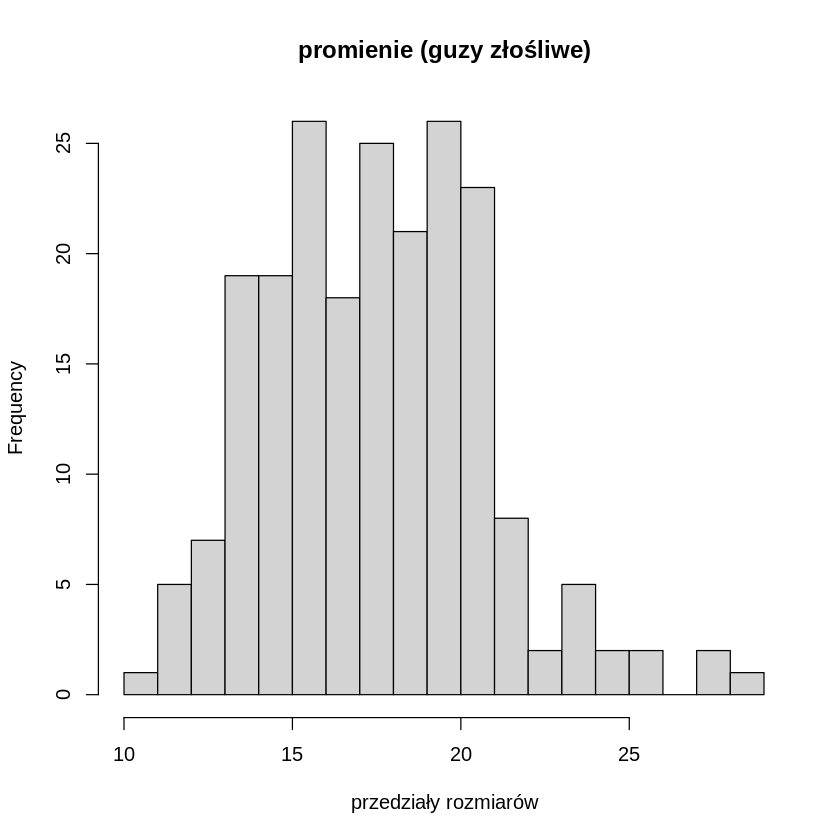

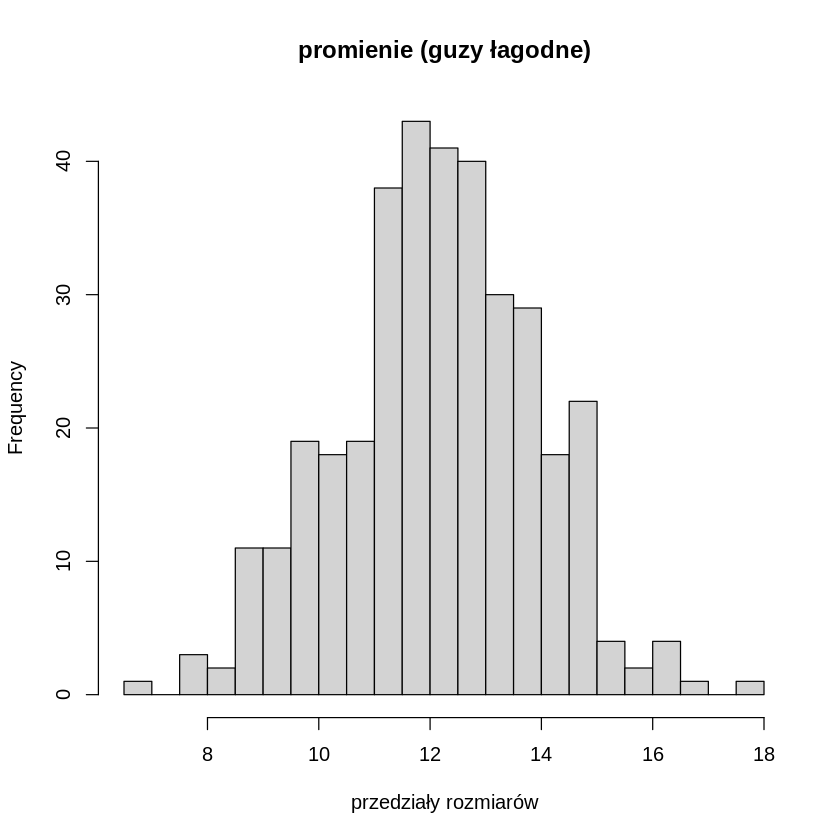

In [ ]:
k <- round(sqrt(length(promienie$zlosliwy)))
histogram <- hist(promienie$zlosliwy, main="promienie (guzy złośliwe)", xlab="przedziały rozmiarów", breaks=k)

k <- round(sqrt(length(promienie$lagodny)))
histogram <- hist(promienie$lagodny, main="promienie (guzy łagodne)", xlab="przedziały rozmiarów", breaks=k)


W przypadku powierzchni rozrzut danych wokół średniej i
różnorodność wyników jest bardzo duża - wariancja i odchylenie przyjmuje 
duże wartości.
Jeśli chodzi o skośność, zarówno dla komórek guzów złośliwych jak i łagodnych
rozkłady są skośne prawostronnie. Siła tej skośności jest jednak 
różna - dla guzów złośliwych wartość skośności przekracza 1, co 
oznacza, że rozkład jest bardzo skośny, dla łagodnych zaś skośność
przyjmuje małą wartość, rozkład więc będzie zatem bliższy rozkładowi 
normalnemu. 
Warto wspomnieć o tym, że dla powierzchni komórek guzów złośliwych obliczone 
wartości miar rozproszenia przyjmują największe wartości. Wariancja 
jest największa, tak samo jak odchylenie, skośność i kurtoza.
Oznacza to, że komórki guzów złośliwych przyjmują bardzo różnorodne powierzchnie.

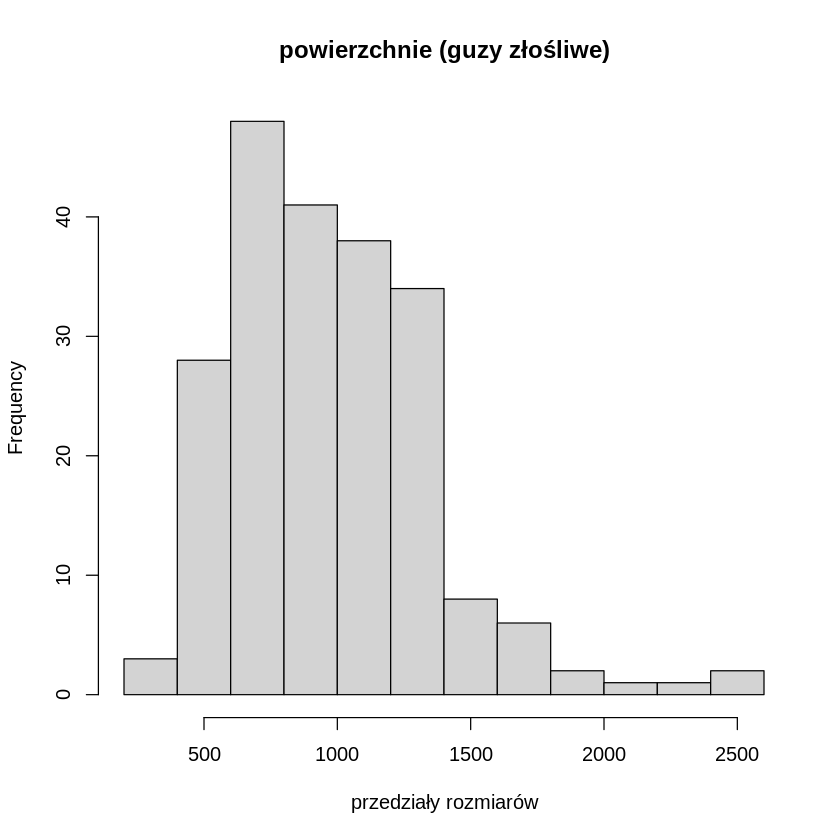

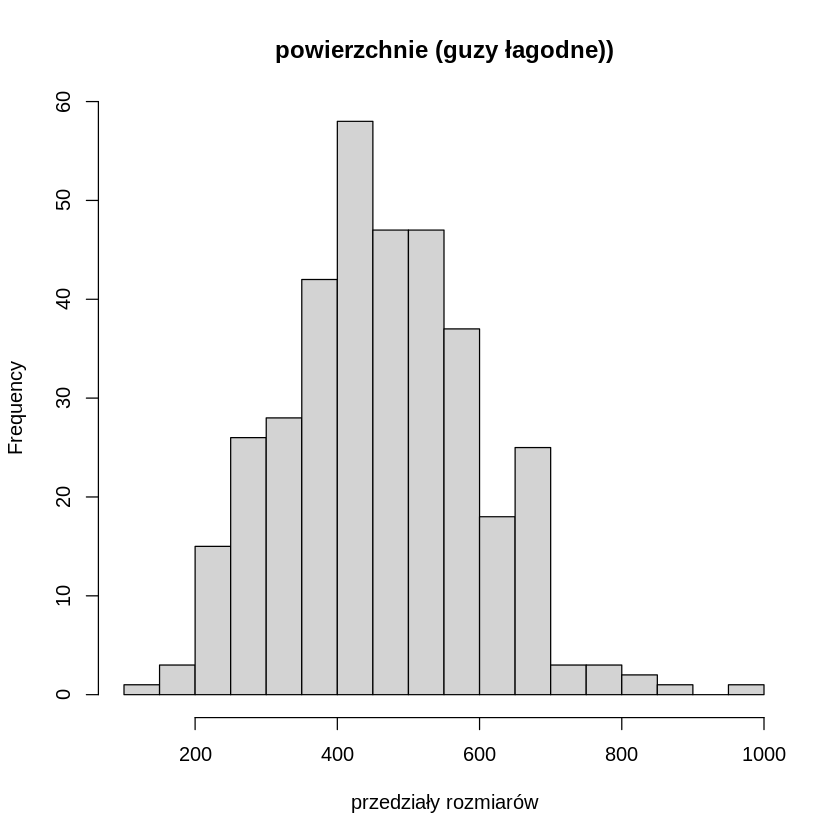

In [ ]:
k <- round(sqrt(length(powierzchnia$zlosliwy)))
histogram <- hist(powierzchnia$zlosliwy, main="powierzchnie (guzy złośliwe)", xlab="przedziały rozmiarów", breaks=k)

k <- round(sqrt(length(powierzchnia$lagodny)))
histogram <- hist(powierzchnia$lagodny, main="powierzchnie (guzy łagodne))", xlab="przedziały rozmiarów", breaks=k)

Jeśli chodzi o obwody dane nie są aż tak odbiegające od średniej jak w 
przypadku powierzchni. Skośność rozkładu dla guzów złośliwych jest prawostronna, a dla łagodnych lewostronna, jednak jest ona nieduża (poniżej 0.5). Kurtozy mają podobne wartości do kurtoz promieni (a dla łagodnych guzów kurtozy są nawet równe).

[1] 15

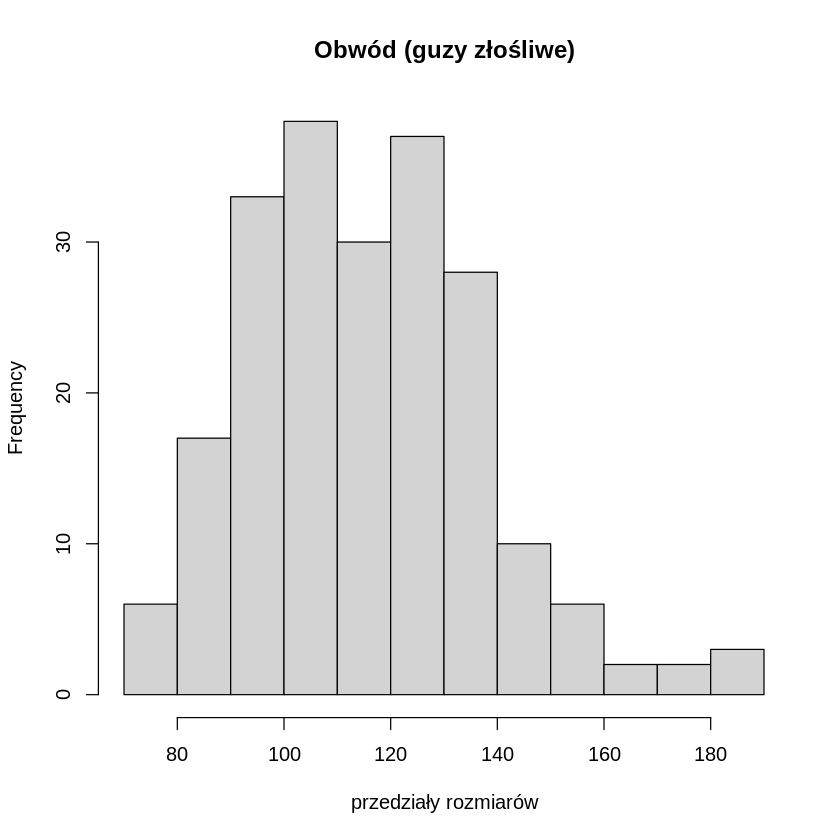

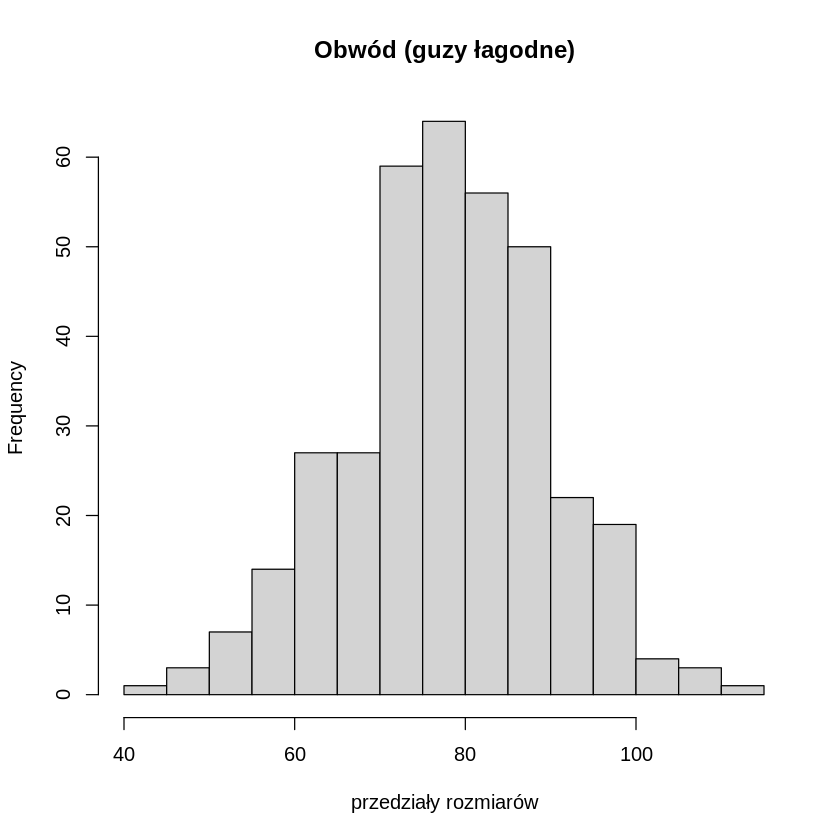

In [ ]:
k <- round(sqrt(length(obwod$zlosliwy)))
k
histogram <- hist(obwod$zlosliwy, main="Obwód (guzy złośliwe)", xlab="przedziały rozmiarów", breaks=k)

k <- round(sqrt(length(obwod$lagodny)))
histogram <- hist(obwod$lagodny, main="Obwód (guzy łagodne)", xlab="przedziały rozmiarów", breaks=k)

###3.5. Dodatkowe wykresy.

###Wizualizacja danych dotyczących diagnozowania guzów łagodnych (0) oraz złośliwych/raków (1).

Poniżej znajduje się diagram kołowy wizualizujący częstotliwość diagnozowania guzów łagodnych oraz złośliwych. 
Spośród 569 pacjentów zdiagnozowano 212 guzów łagodnych, co stanowi 62.74% rozpatrywanych przypadków oraz 357 guzów złośliwych, co stanowi 37.26% przypadków.

[1] "Liczba zdiagnozowanych guzów złośliwych: 212"

[1] "Liczba zdiagnozowanych guzów łagodnych: 357"

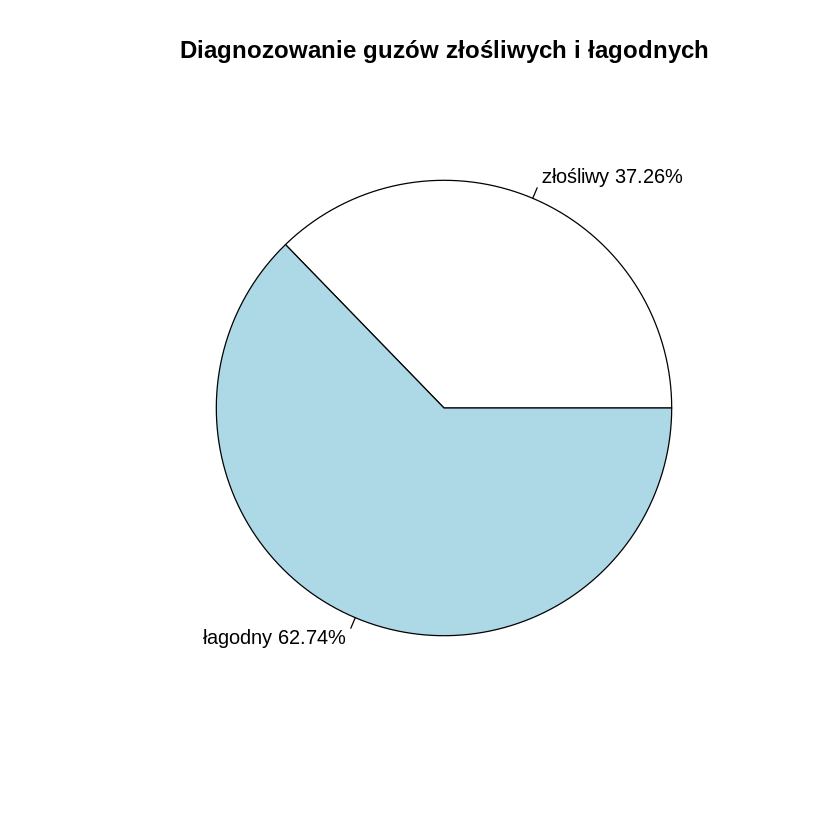

In [ ]:
złośliwy <- sum(data$diagnosis == 0)
łagodny <- sum(data$diagnosis == 1)

sprintf("Liczba zdiagnozowanych guzów złośliwych: %d", złośliwy)
sprintf("Liczba zdiagnozowanych guzów łagodnych: %d", łagodny)
slices <- c(złośliwy, łagodny)
lbls <- c("złośliwy", "łagodny")
pr <- round(slices/sum(slices)*100, 2)
lbls <- paste(lbls, pr) # dodanie procentów do nazw
lbls <- paste(lbls,"%",sep="") # dodanie % do nazw
pie(slices, labels = lbls, main="Diagnozowanie guzów złośliwych i łagodnych")

#2. Test statystyczny.

W tej części zostanie przeprowadzony test statystyczny. Sprawdzimy na poziomie istotności 0.05 czy długość dla promieni komórek łagodnych guzów jest średnio równa czy też mniejsza od 12. Naszą populacją będą pacjenci szpitala Wisconsin-Madison, którzy mają zdiagnozowanego guza łagodnego.

In [10]:
p1 <- c() #wektor na elementy proby
n1 <- 50 #rozmiar proby
for (i in 1:50)
{
      p1 <- append(p1, promienie$lagodny[i])
}

sigma1 <- round(sd(promienie$lagodny), 2) #odchylenie std populacja
mi1 <- mean(promienie$lagodny) #srednia populacji
x1 <- mean(p1) #srednia z proby

sprintf("Odchylenie standardowe populacji dla promieni (guzy łagodne): %f", sigma1)
sprintf("Średnia z populacji promieni dla guzów łagodnych: %f", round(mi1, 2))
sprintf("Średnia z próbki promieni dla guzów łagodnych: %f", round(x1, 2))

[1] "Odchylenie standardowe populacji dla promieni (guzy łagodne): 1.780000"

[1] "Średnia z populacji promieni dla guzów łagodnych: 12.150000"

[1] "Średnia z próbki promieni dla guzów łagodnych: 11.470000"

Z racji tego, że mamy dużą próbkę (50) i odchylenie standardowe populacji jest znane, a rozkład danych możemy przybliżyć rozkładem normalnym, przeprowadzamy test Z lewostronny. Zdefinujmy hipotezę zerową i alternatywną:

H0: µ1 = 12

H1: µ1 < 12


 Wyliczamy wartość statystyki testowej Z:

In [11]:
Z <- (mean(p1)-12)/sd(promienie$lagodny)*sqrt(n1)
Z

[1] -2.121664

Wyznaczamy przedział krytyczny:

In [12]:
alfa <- 0.05
qnorm(alfa, mean=0, sd=1)

[1] -1.644854

Wyznaczony przedział krytyczny to: (-inf, -1.64>. Wartość statystyki testowej jest równa -2.12, więc wpadamy do obszaru krytycznego. Odrzucamy hipotezę zerową i przyjmujemy, że hipoteza alternatywna jest prawdziwa.

#Podsumowanie

Celem tej analizy było ukazanie różnic w trzech podstawowych parametrach opisujących komórki guzów. Istnieją zauważalne różnice pomiędzy tymi guzami i w przybliżeniu można stwierdzić, że guzy złośliwe mają o ponad 40% większe parametry niż guzy łagodne. Na podstawie wyników można też wnioskować, które parametry są najbardziej różnorodne (powierzchnia komórek guzów złośliwych, która miała najwięjsze odchyły od średniej). Wykonany test statystyczny pozwolił nam również przyjąć hipotezę dotyczącą guzów łagodnych, o tym, że ich promień jest średnio mniejszy od 12.